# NETWORKX

## PRIMI PASSI

In [1]:
import os
import networkx as nx
import pandas as pd
import numpy as np

print("Setup completed!")

Setup completed!


In [2]:
data_folder = "data"
    
import pprint
pp = pprint.PrettyPrinter()

## NODI

In [3]:
graph = nx.Graph()
graph_second = nx.Graph()
# Aggiunta nodi al primo grafo
graph.add_node("Wednesday")
graph.add_nodes_from(["Social", "Computing", 2020])
# Aggiunta nodi al secondo grafo
graph_second.add_nodes_from(range(0,10))
# Aggiunta del secondo grafo al primo
graph.add_nodes_from(graph_second)
print(graph.nodes)

['Wednesday', 'Social', 'Computing', 2020, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## ARCHI

In [4]:
graph_second.add_edge(4,5)
graph.add_edges_from([(0, 1), (0, 3), (1, 2), (2, 3)])
graph.add_edges_from(graph_second.edges)
print(graph.edges)

[(0, 1), (0, 3), (1, 2), (2, 3), (4, 5)]


## ESAMINARE IL GRAFO

In [5]:
print(graph.nodes())
print(graph.edges())
print(graph.number_of_nodes())
print(graph.number_of_edges())
print(graph.adj[0])
print(graph.degree[0])

['Wednesday', 'Social', 'Computing', 2020, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 3), (1, 2), (2, 3), (4, 5)]
14
5
{1: {}, 3: {}}
2


In [6]:
graph.remove_node("Wednesday")
graph.remove_edge(4,5)
print(graph.nodes())
print(graph.edges())
print(graph.number_of_nodes())
print(graph.number_of_edges())

['Social', 'Computing', 2020, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 3), (1, 2), (2, 3)]
13
4


In [7]:
print(graph[1], "----------", graph.adj[1])
print(graph[1][2], "----------", graph.edges[1, 2])
graph[1][2]["color"] = "yellow"
print(graph[1][2], "----------", graph.edges[1, 2])
print("##########")
for node, adj in graph.adjacency():
    print(node, adj)
print("##########")
for node_1, node_2 in graph.edges():
    print(node_1, node_2)

{0: {}, 2: {}} ---------- {0: {}, 2: {}}
{} ---------- {}
{'color': 'yellow'} ---------- {'color': 'yellow'}
##########
Social {}
Computing {}
2020 {}
0 {1: {}, 3: {}}
1 {0: {}, 2: {'color': 'yellow'}}
2 {1: {'color': 'yellow'}, 3: {}}
3 {0: {}, 2: {}}
4 {}
5 {}
6 {}
7 {}
8 {}
9 {}
##########
0 1
0 3
1 2
2 3


## ATTRIBUTI

In [8]:
graph = nx.Graph(type="soc_com_graph")
graph.graph["year"] = ["2020"]
graph.add_node("374", username="JohnSmith", kind="Employer")
graph.add_nodes_from(["451", "11"], kind='Employee')
graph.add_edge("374", "11", status="Leader")
graph.add_edge("374", "451", status="Leader")
graph.add_edges_from([("11", "451", {"status":"Colleague"})])
print(graph.nodes().data())
print(graph.edges().data())
print(graph.nodes["374"])
print(graph.edges["374", "11"]["status"])
print(graph.nodes(1))

[('374', {'username': 'JohnSmith', 'kind': 'Employer'}), ('451', {'kind': 'Employee'}), ('11', {'kind': 'Employee'})]
[('374', '11', {'status': 'Leader'}), ('374', '451', {'status': 'Leader'}), ('451', '11', {'status': 'Colleague'})]
{'username': 'JohnSmith', 'kind': 'Employer'}
Leader
[('374', None), ('451', None), ('11', None)]


## GRAFI DIRETTI

In [9]:
directed_graph = nx.DiGraph()
directed_graph.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
directed_graph.out_degree(1, weight='weight')
directed_graph.degree(1, weight='weight')
directed_graph.add_node(5)
print(directed_graph.nodes())
print(directed_graph.nodes().data())
print(directed_graph.edges())
print(directed_graph.edges().data())
print(list(directed_graph.neighbors(1)), "---------", list(directed_graph.successors(1)))

[1, 2, 3, 5]
[(1, {}), (2, {}), (3, {}), (5, {})]
[(1, 2), (3, 1)]
[(1, 2, {'weight': 0.5}), (3, 1, {'weight': 0.75})]
[2] --------- [2]


## GENERATORI E OPERAZIONI

In [10]:
special_graph = nx.petersen_graph()
print(special_graph.nodes())
print(special_graph.edges())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]


In [12]:
special_graph = nx.complete_graph(6)
print(special_graph.nodes())
print(special_graph.edges())

[0, 1, 2, 3, 4, 5]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


In [13]:
special_graph = nx.watts_strogatz_graph(20, 4, 0.2)
print(special_graph.nodes())
print(special_graph.edges())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[(0, 1), (0, 19), (0, 18), (0, 12), (1, 2), (1, 19), (1, 10), (2, 6), (2, 19), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (5, 15), (6, 7), (6, 8), (7, 8), (7, 9), (8, 9), (8, 10), (9, 10), (9, 11), (10, 11), (10, 12), (10, 14), (11, 12), (11, 16), (12, 13), (12, 14), (13, 14), (13, 15), (14, 15), (14, 16), (15, 16), (15, 17), (16, 17), (17, 18), (18, 19)]


# GAME OF GRAPHS

## DATAFRAME

In [14]:
nodes_df = pd.read_csv("data/asoiaf/asoiaf-all-nodes.csv")
edges_df = pd.read_csv("data/asoiaf/asoiaf-all-edges.csv")
display(nodes_df, edges_df)

,Id,Label
0,Addam-Marbrand,Addam Marbrand
1,Aegon-Frey-(son-of-Stevron),Aegon Frey (son of Stevron)
2,Aegon-I-Targaryen,Aegon I Targaryen
3,Aegon-Targaryen-(son-of-Rhaegar),Aegon Targaryen (son of Rhaegar)
4,Aegon-V-Targaryen,Aegon V Targaryen
...,...,...
791,Yorko-Terys,Yorko Terys
792,Ysilla,Ysilla
793,Yurkhaz-zo-Yunzak,Yurkhaz zo Yunzak
794,Zei,Zei


,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3
...,...,...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,Undirected,2818,4
2819,Waymar-Royce,Will-(prologue),Undirected,2819,18
2820,Weasel,Weese,Undirected,2820,6
2821,Woth,Yoren,Undirected,2821,4


In [16]:
display(edges_df.head(2))
display(edges_df.tail(2))
rows = edges_df.loc[edges_df["Source"]=="Robb-Stark"]
display(rows["Target"].head(2))
display(rows["Target"].values)

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3


,Source,Target,Type,id,weight
2821,Woth,Yoren,Undirected,2821,4
2822,Yandry,Ysilla,Undirected,2822,14


2603    Robert-Baratheon
2604         Robin-Flint
Name: Target, dtype: object

array(['Robert-Baratheon', 'Robin-Flint', 'Rodrik-Cassel',
       'Rollam-Westerling', 'Rolph-Spicer', 'Roose-Bolton', 'Roslin-Frey',
       'Ryman-Frey', 'Samwell-Tarly', 'Sansa-Stark', 'Stafford-Lannister',
       'Stannis-Baratheon', 'Stevron-Frey', 'Stiv', 'Sybell-Spicer',
       'Theon-Greyjoy', 'Torrhen-Karstark', 'Tristifer-IV-Mudd',
       'Tyrion-Lannister', 'Tywin-Lannister', 'Utherydes-Wayn', 'Varys',
       'Walder-Frey', 'Walder-Rivers', 'Wendel-Manderly',
       'Willem-Lannister', 'Wyman-Manderly', 'Yoren'], dtype=object)

## VISUALIZZARE

In [17]:
for index, row in edges_df.head(2).iterrows():
    display(row)

Source    Addam-Marbrand
Target     Brynden-Tully
Type          Undirected
id                     0
weight                 3
Name: 0, dtype: object

Source      Addam-Marbrand
Target    Cersei-Lannister
Type            Undirected
id                       1
weight                   3
Name: 1, dtype: object

In [18]:
game_of_graphs = nx.Graph()
for index, row in nodes_df.iterrows():
    game_of_graphs.add_node(row["Id"], label=row['Label'])
for index, row in edges_df.iterrows():
    game_of_graphs.add_edge(row["Source"], row["Target"], weight=row['weight'], id=row["id"])

## PROGRAMMA COMPLETO

In [25]:
nodes_df = pd.read_csv("data/asoiaf/asoiaf-all-nodes.csv")
edges_df = pd.read_csv("data/asoiaf/asoiaf-all-edges.csv")
game_of_graphs = nx.Graph()
for index, row in nodes_df.iterrows():
    game_of_graphs.add_node(row["Id"], label=row['Label'])
for index, row in edges_df.iterrows():
    game_of_graphs.add_edge(row["Source"], row["Target"], weight=row['weight'], id=row["id"])
nx.write_gpickle(game_of_graphs, "data/game_of_graphs.pkl")

In [20]:
game_of_graphs = nx.read_gpickle("data/game_of_graphs.pkl")
print(game_of_graphs.number_of_nodes())
print(game_of_graphs.number_of_edges())
print("###########")
print(game_of_graphs.adj["Robb-Stark"])

796
2823
###########
{'Aegon-Frey-(son-of-Stevron)': {'weight': 5, 'id': 13}, 'Arya-Stark': {'weight': 44, 'id': 348}, 'Balon-Greyjoy': {'weight': 11, 'id': 441}, 'Benjen-Stark': {'weight': 7, 'id': 559}, 'Bran-Stark': {'weight': 169, 'id': 665}, 'Brandon-Stark': {'weight': 3, 'id': 686}, 'Brienne-of-Tarth': {'weight': 5, 'id': 720}, 'Brynden-Tully': {'weight': 27, 'id': 779}, 'Catelyn-Stark': {'weight': 128, 'id': 842}, 'Cersei-Lannister': {'weight': 15, 'id': 932}, 'Cleos-Frey': {'weight': 11, 'id': 986}, 'Dacey-Mormont': {'weight': 3, 'id': 1076}, 'Davos-Seaworth': {'weight': 3, 'id': 1183}, 'Desmond-Grell': {'weight': 4, 'id': 1201}, 'Eddard-Stark': {'weight': 46, 'id': 1333}, 'Edmure-Tully': {'weight': 51, 'id': 1380}, 'Elmar-Frey': {'weight': 9, 'id': 1411}, 'Galbart-Glover': {'weight': 5, 'id': 1459}, 'Gregor-Clegane': {'weight': 4, 'id': 1556}, 'Hallis-Mollen': {'weight': 13, 'id': 1635}, 'Hodor': {'weight': 5, 'id': 1717}, 'Hoster-Tully': {'weight': 4, 'id': 1732}, 'Hullen': {

## NODI

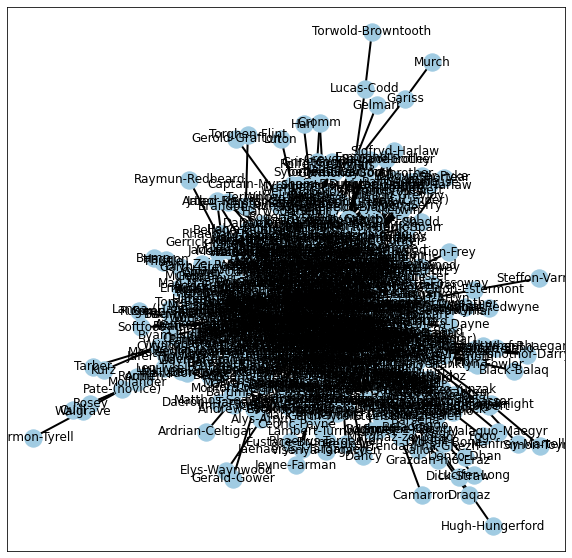

In [6]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
game_of_graphs = nx.read_gpickle("data/game_of_graphs.pkl")
nx.draw_networkx(
    game_of_graphs, 
    pos=nx.spring_layout(game_of_graphs),
    node_color='#A0CBE2',
    width=2,
    edge_cmap=plt.cm.Blues,
    with_labels=True
)
plt.savefig("data/game_of_graphs.pdf")
plt.show()
plt.close()

20
82


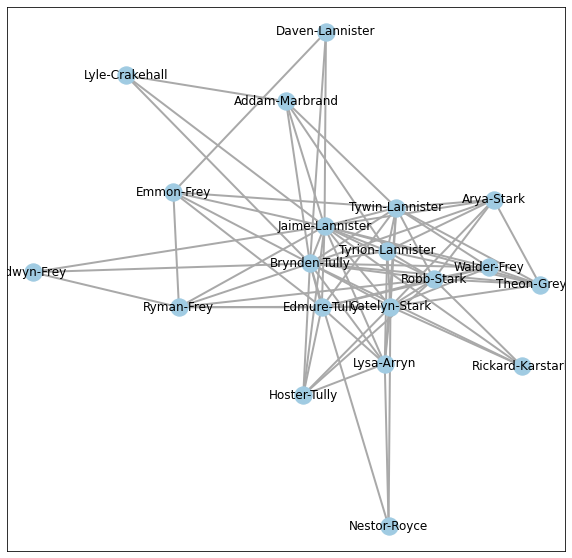

In [7]:
game_of_graphs = nx.read_gpickle("data/game_of_graphs.pkl")
reduced_graph = nx.ego_graph(game_of_graphs, "Brynden-Tully", radius=1)
print(reduced_graph.number_of_nodes())
print(reduced_graph.number_of_edges())
nx.draw_networkx(
    reduced_graph, 
    pos=nx.spring_layout(reduced_graph),
    node_color='#A0CBE2',
    edge_color="#a9a9a9",
    width=2,
    with_labels=True
)
plt.savefig("data/brynden_tully_graph.pdf")
plt.show()
plt.close()

In [17]:
from pyvis.network import Network
game_of_graphs = nx.read_gpickle("data/game_of_graphs.pkl")
nt = Network(
    height="100%", 
    width="100%", 
    bgcolor="#222222", 
    font_color="white",
    heading="Game of Graphs"
)
nt.barnes_hut()
nt.from_nx(game_of_graphs)
neighbor_map = nt.get_adj_list()
for node in nt.nodes:
    node["value"] = len(neighbor_map[node["id"]])
nt.show("game_of_graphs.html")

In [9]:
def draw(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=150, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

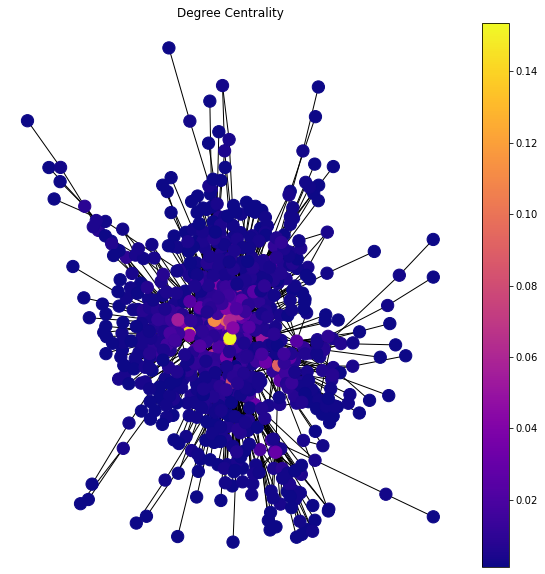

In [33]:
game_of_graphs = nx.read_gpickle("data/game_of_graphs.pkl")
#print(nx.degree_centrality(game_of_graphs))
draw(
    game_of_graphs, 
    nx.spring_layout(game_of_graphs), 
    nx.degree_centrality(game_of_graphs), 
    'Degree Centrality'
)

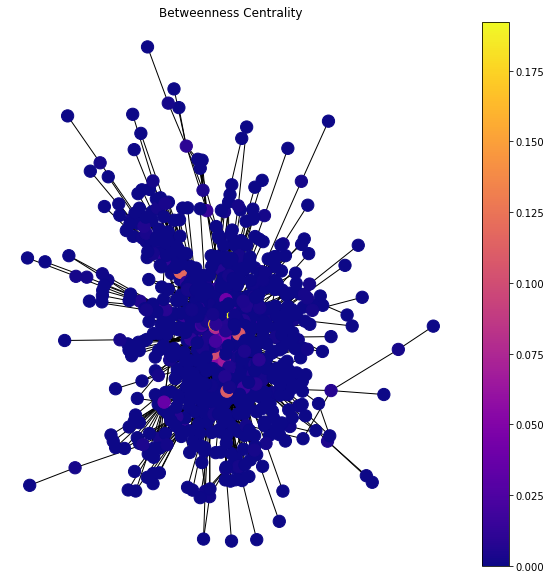

In [34]:
game_of_graphs = nx.read_gpickle("data/game_of_graphs.pkl")
#print(nx.betweenness_centrality(game_of_graphs))
draw(
    game_of_graphs, 
    nx.spring_layout(game_of_graphs), 
    nx.betweenness_centrality(game_of_graphs), 
    'Betweenness Centrality'
)

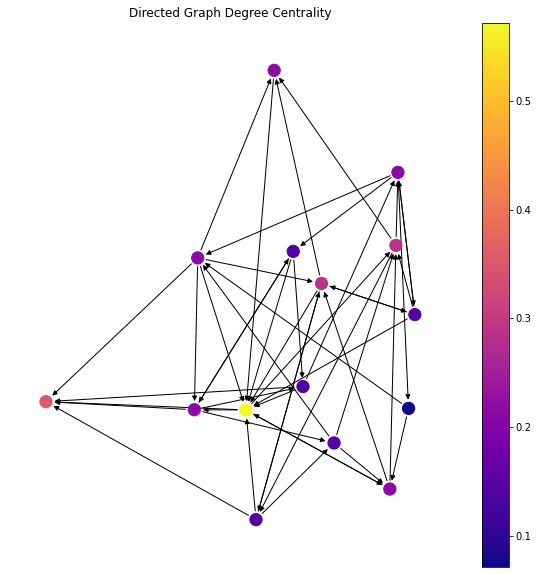

In [11]:
graph = nx.fast_gnp_random_graph(15, 0.25, directed=True)
draw(
    graph, 
    nx.spring_layout(graph), 
    nx.in_degree_centrality(graph), 
    'Directed Graph Degree Centrality'
)

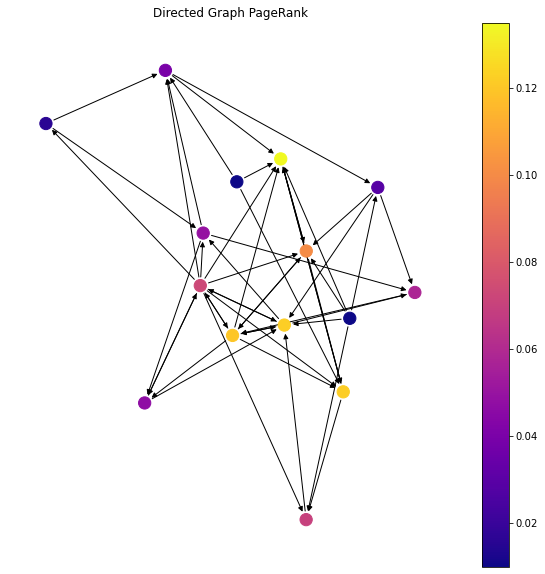

In [37]:
graph = nx.fast_gnp_random_graph(15, 0.25, directed=True)
draw(
    graph, 
    nx.spring_layout(graph), 
    nx.pagerank(graph, alpha=0.85), 
    'Directed Graph PageRank'
)

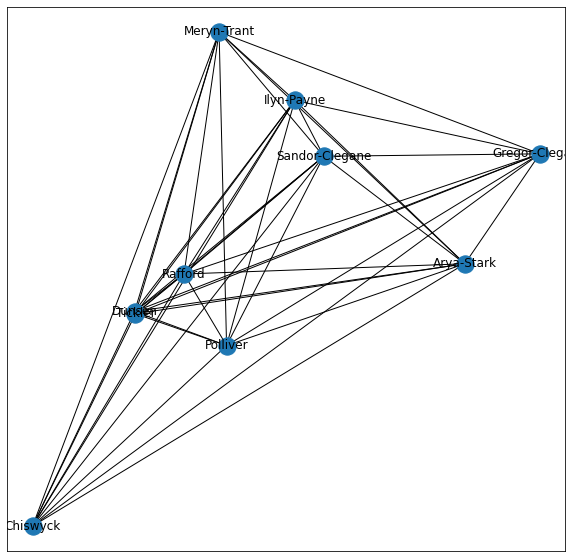

In [31]:
from networkx.algorithms.approximation import clique
game_of_graphs = nx.read_gpickle("data/game_of_graphs.pkl")
max_cl = clique.max_clique(game_of_graphs)
clique_subgraph = game_of_graphs.subgraph(max_cl)
layout = nx.spring_layout(game_of_graphs)
nx.draw_networkx(clique_subgraph, pos=layout)
plt.show()
plt.close()